# [OpenCV-Python Tutorial] Getting Started

In this notebook, we will see how to use OpenCV-Python and some basic operations of OpenCV.

---

# Import OpenCV-Python and other packages

In [19]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.1.0


# Open/display an image

In [35]:
img = cv2.imread('images/messi.jpg')

# If the image path is wrong, the resulting img will be none
if img is None:
    print ('Open Error')
else:
    print ('Image Loaded')

Image Loaded


In [6]:
# Check the resulting img
print (type(img))
print (img.shape)
print (img.dtype)
print (img[:2, :2, :] ) # Right-upper-most few pixels of the image

<class 'numpy.ndarray'>
(342, 548, 3)
uint8
[[[39 43 44]
  [42 46 47]]

 [[37 40 44]
  [42 45 49]]]


# Basic operations on Images
## 1. Draw an object

- `cv2.line(image, startPoint, endPoint, rgb, thinkness)`
- `cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)`
- `cv2.circle(image, center, radius, rgb, thinkness)`
- `cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)`

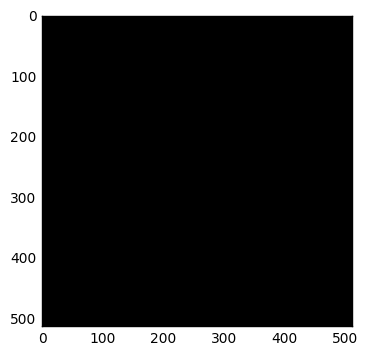

In [5]:
# Create a black image
img2 = np.zeros((512,512,3), np.uint8)
plt.imshow(img2)

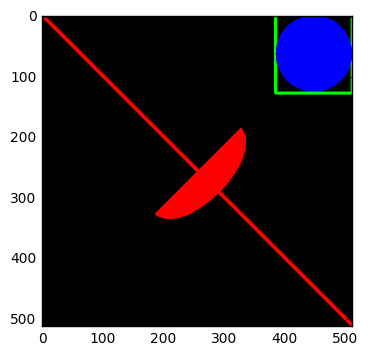

In [6]:
# Draw a line using cv2.line(image, startPoint, endPoint, rgb, thinkness)
cv2.line(img2, (0,0), (511,511), (255,0,0), 5)
# => Diagonal red line with thickness of 5 px

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv2.rectangle(img2, (384,0), (510,128), (0,255,0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv2.circle(img2, (447,63), 63, (0,0,255), -1)
# => Blue filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv2.ellipse(img2, (256,256), (100,50), -45, 0, 180, (255,0,0), -1)
# => Red wide down-half ellipse

plt.imshow(img2)

[[[ 10  10]]

 [[150 200]]

 [[300 150]]

 [[200  50]]]


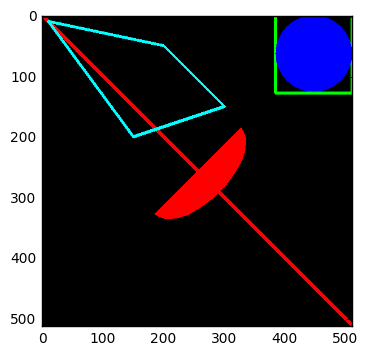

In [7]:
# Draw a line using cv2.polylines(image, points, isClosed, rgb, thinkness, lineType, shift)
pts = np.array([[10,10],[150,200],[300,150],[200,50]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img2,[pts],True,(0,255,255),3)
# => Cyan closed quadrangle 

print pts
plt.imshow(img2)

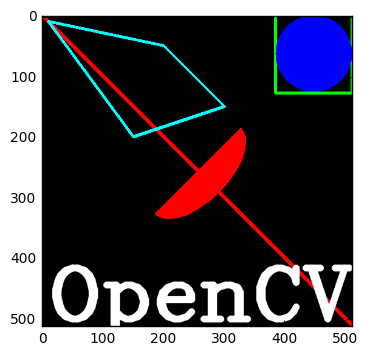

In [8]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img2, 'OpenCV', (10,500), font, 4, (255,255,255), 10, cv2.LINE_AA)
# => White 'OpenCV' text at the bottom

plt.imshow(img2)

---

## 2. Modify pixels & ROI

- You can access/modify a single pixel or ROI using Numpy indexing.
- Just like matrix indexing, `img[a, b]` refer to `a`-th row and `b`-th column.

In [3]:
# Access a pixel value(BGR order)
img[50, 235]

array([29, 24, 25], dtype=uint8)

In [15]:
# Change pixel values
for i in range(5):
    for j in range(5):
        img[50+i, 235+j] = (0, 255, 0)
# => Green dot above messi's head

plt.imshow(img)

ValueError: setting an array element with a sequence.

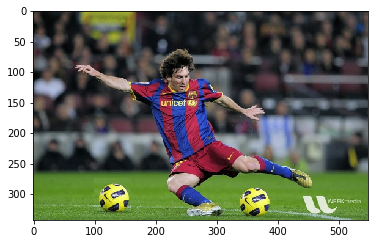

In [18]:
# ROI is obtained using Numpy indexing 
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

# img[50:55, 235:240] = (0, 255, 0)  # The for-loop in the code block above is equavalent to this line. 

plt.imshow( )

---

## 2. Canny Edge Detection

`edges = cv2.Canny(image, threshold1, threshold2, apatureSize=3, L2gradient=False)`

- `image`: 8-bit grayscale input image
- `threshold1`/`threshold2`: thresholds for the hysteresis procedure

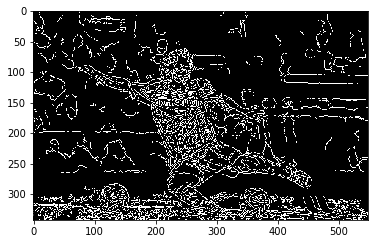

In [12]:
# Canny edge detection
threshold1 = 125
threshold2 = 12
canny = cv2.Canny(img, threshold1, threshold2)

plt.imshow(canny, cmap='gray')

---

### Reference

Please see the following official tutorials for more detailed explanation.

 - [Basic Operations on Images — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_basic_ops/py_basic_ops.html)
 - [Drawing Functions in OpenCV — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html)